# Set-up
We are going to assume that $y=f(x)$ with $x \in \mathbb{R}$ and $y \in \mathbb{R}$, where $f(x)$ is some function. Then we are going to learn the polynomial of degree 2, 3, and 10 on 10 point of training data, and see how they perform on the training set. Then we will use a validation set of 10 points to pick the best model. At the end we will use 10 points as test set, to estimate the generalization error. You can think of having had 30 points in your data and decided to use 10 for training, 10 for validation, and 10 for testing.


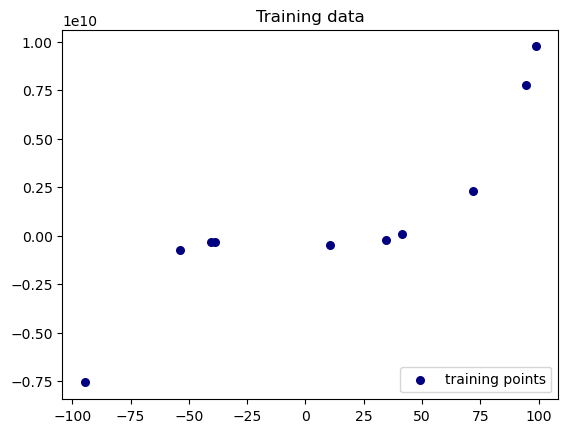

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib inline

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import random

random.seed(105)

#generate data according to a polynomial of degree 5 + noise; noise is added after we computed f
def f(x):
    """ function to approximate by polynomial interpolation"""
#    return x * np.sin(x)
    return np.polynomial.polynomial.polyval(x,[-72., 162., -28., -31.5, 2.5, 1])+200000000*np.random.normal(size=len(x))

#generate data according to the same polynomial of degree 5 above but without noise - used only
#for plotting!
def f_noisefree(x):
    """ function to approximate by polynomial interpolation"""
#    return x * np.sin(x)
    return np.polynomial.polynomial.polyval(x,[-72., 162., -28., -31.5, 2.5, 1])


# generate points used to plot
x_plot = np.linspace(-100, 100, 1000)

# generate points and keep a subset of them
x = np.linspace(-100, 100, 1000)
rng = np.random.RandomState(0)
rng.shuffle(x)

#the training data comprises 10 points
x_train = np.sort(x[:10])
#we assume th
y_train = f(x_train)


# create matrix versions of these arrays
X_train = x_train[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

#for plotting
lw = 2
plt.scatter(x_train, y_train, color='navy', s=30, marker='o', label="training points")
plt.legend(loc='lower right')
plt.title('Training data')
plt.show()


Error (1-R^2) on training data for polynomial of degree 2: 0.2324007751702022
Error (1-R^2) on training data for polynomial of degree 3: 0.00343159223517997
Error (1-R^2) on training data for polynomial of degree 10: 5.226311414974205e-06


Text(0.5, 1.0, 'Best models learned from training data')

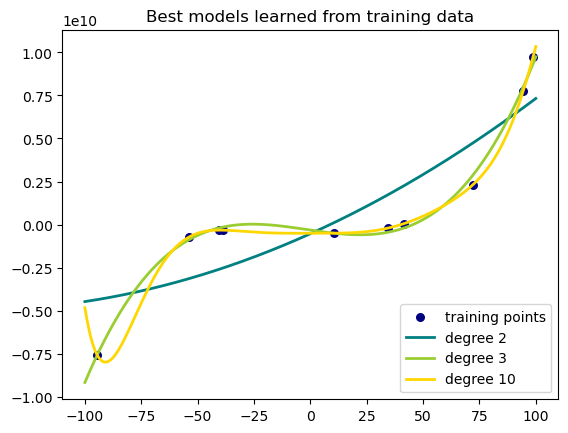

In [2]:
#for plot

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.scatter(x_train, y_train, color='navy', s=30, marker='o', label="training points")

#train the best polynomial model of degrees 2, 3, and 10 using functions from scikit-learn, and plot them
for count, degree in enumerate([2, 3, 10]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)
    print("Error (1-R^2) on training data for polynomial of degree "+str(degree)+": "+str(1.-model.score(X_train,y_train)))
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower right')
plt.title('Best models learned from training data')


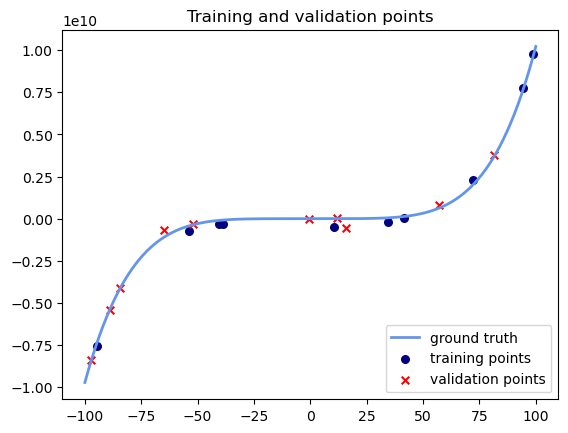

In [3]:

#let's use a validation dataset of the same number of points of the training set
x_validation = np.sort(x[10:20])
y_validation = f(x_validation)
#y_validation = f(x_validation)+200000000*np.random.normal(size=len(x_validation))

# create matrix versions of these arrays
X_validation = x_validation[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]


#for plotting
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f_noisefree(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x_train, y_train, color='navy', s=30, marker='o', label="training points")
plt.scatter(x_validation, y_validation, color='red', s=30, marker='x', label="validation points")
plt.title('Training and validation points')
plt.legend(loc='lower right')
plt.show()

Error (1-R^2) on validation data for polynomial of degree 2: 0.40685459780590505
Error (1-R^2) on validation data for polynomial of degree 3: 0.040687719004496414
Error (1-R^2) on validation data for polynomial of degree 10: 0.1936234456187489


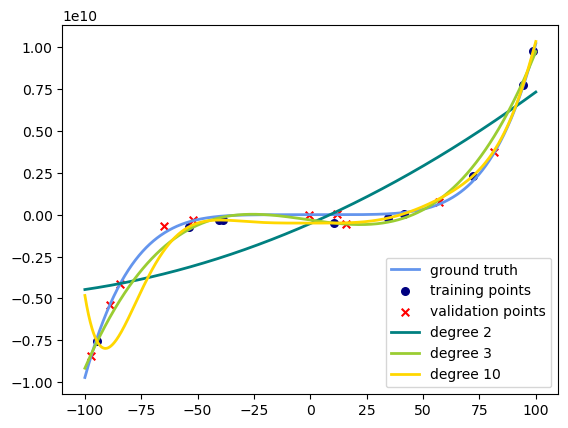

In [4]:
#now let's see how well they perform on the validation set
#for plotting  
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f_noisefree(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x_train, y_train, color='navy', s=30, marker='o', label="training points")
plt.scatter(x_validation, y_validation, color='red', s=30, marker='x', label="validation points")

for count, degree in enumerate([2, 3, 10]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)
    print("Error (1-R^2) on validation data for polynomial of degree "+str(degree)+": "+str(1.-model.score(X_validation,y_validation)))
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower right')

In [19]:
#now let's use a test set to estimate the generalization error
x_testing = np.sort(x[20:30])
print(x_testing)
y_testing = f(x_testing)

# create matrix versions of these arrays
X_testing = x_testing[:, np.newaxis]


for count, degree in enumerate([3]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    print("Error (1-R^2) on test data for polynomial of degree "+str(degree)+": "+str(1.-model.score(X_testing,y_testing)))

[-99.7997998  -93.79379379 -90.99099099 -79.37937938 -37.93793794
 -37.73773774  -3.7037037   52.15215215  57.75775776  76.77677678]
Error (1-R^2) on test data for polynomial of degree 3: 0.023405914846594156
